In [83]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec            # to arrange the plots nicely
import pandas as pd

%matplotlib inline

In [108]:
#=====================================
# Load txt file to pandas dataframe
#=====================================
data_raw = pd.read_csv('mu-g4.txt', sep='\t', names=['tdc11', 'tdc12', 'tdc13', 'tdc14', 'tdc15', 'tdc16', 'tdc17', 'tdc18',
                                                        'tdc21', 'tdc22', 'tdc23', 'tdc24', 'tdc25', 'tdc26', 'tdc27', 'tdc28',
                                                       ])
data_raw = data_raw.rename(columns={'tdc11' : 'p0_1',
                            'tdc12' : 'p1_1',
                            'tdc13' : 'p2_1',
                            'tdc14' : 'start2',
                            'tdc24' : 'p0_2',
                            'tdc25' : 'p1_2',
                            'tdc26' : 'p2_2',
                            'tdc23' : 'stop2',
                           })
print('Total number of events:', len(data_raw))
#data_raw.head()

Total number of events: 1014917


In [86]:
# keeps only necessary

data = data_raw[['p0_1','p1_1','p2_1','start2','p0_2','p1_2','p2_2','stop2']]
#data.head()

In [87]:
# loads fitted parameters from parameters.txt

par=pd.read_csv('parameters.txt', sep=' ', names=['tdc','a','b'])
df_par=par.set_index('tdc')
#df_par.head()

In [88]:
#=====================================
# Convert tdc units into ns
#=====================================
def tdc_to_ns(channel, tdc_unit):
    ns = (tdc_unit - df_par.loc[channel, 'b']) / df_par.loc[channel, 'a']
    return ns

#=====================================
# Only one valide time for each detector
#=====================================
def merge_time(d,number):
    if (d['p%i_1'%(number)]==4095):
        return d['p%i_2_ns'%(number)]
    else:
        return d['p%i_1_ns'%(number)]
    
#=====================================
# Add actual time variables to the dataframe
#=====================================
def conv_time(d):
    d['start2_ns'] = tdc_to_ns('tdc14', d.start2)
    d['p0_1_ns'] = tdc_to_ns('tdc11', d.p0_1)
    d['p1_1_ns'] = tdc_to_ns('tdc12', d.p1_1)
    d['p2_1_ns'] = tdc_to_ns('tdc13', d.p2_1)
    d['p0_2_ns'] = tdc_to_ns('tdc24', d.p0_2) + d.start2
    d['p1_2_ns'] = tdc_to_ns('tdc25', d.p1_2) + d.start2
    d['p2_2_ns'] = tdc_to_ns('tdc26', d.p2_2) + d.start2
    
    d['p0_time'] = d.apply(lambda d: merge_time(d,0),axis=1)
    d['p1_time'] = d.apply(lambda d: merge_time(d,1),axis=1)
    d['p2_time'] = d.apply(lambda d: merge_time(d,2),axis=1)
    return d

In [116]:
#=====================================
# Data selection cuts
#=====================================

# eventi sui singoli piani
def cut_p0(data):
    cut = ((data.p0_1!=4095) | (data.p0_2!=4095)) & ((data.p1_1==4095) & (data.p1_2==4095)  & (data.p2_1==4095) & (data.p2_2==4095))
    p0 = data[cut]
    #p0 = p0.rename(columns={'p0_1': 'time_tdc1', 'p0_2': 'time_tdc2'})
    #p0 = p0[['tdc1','tdc2']]
    return p0

def cut_p1(data):
    cut = ((data.p1_1!=4095) | (data.p1_2!=4095)) & ((data.p0_1==4095) & (data.p0_2==4095)  & (data.p2_1==4095) & (data.p2_2==4095))
    p1 = data[cut]
    #p1 = p1.rename(columns={'p1_1': 'time_tdc1', 'p1_2': 'time_tdc2'})
    #p1 = p1[['tdc1','tdc2']]
    return p1

def cut_p2(data):
    cut = ((data.p2_1!=4095) | (data.p2_2!=4095)) & ((data.p1_1==4095) & (data.p1_2==4095)  & (data.p0_1==4095) & (data.p0_2==4095))
    p2 = data[cut]
    #p2 = p2.rename(columns={'p2_1': 'time_tdc1', 'p2_2': 'time_tdc2'})
    #p2 = p2[['tdc1','tdc2']]
    return p2

# buoni
# segnale su 1 ma non su 2, 0 indifferente 
def cut_muon_soft(data):
    cut = ((data.p1_1!=4095) | (data.p1_2!=4095)) & (data.p2_1==4095) & (data.p2_2==4095)
    ms=data[cut]
    return ms



In [93]:
#=====================================
# Apply first selection and add time variables to main dataframe
#=====================================

data_used = data[(data.p0_1!=4095) | (data.p0_2!=4095) | (data.p1_1!=4095) | (data.p1_2!=4095) | (data.p2_1!=4095) | (data.p2_2!=4095)]
data_used = conv_time(data_used)
print('Total numer of triggers:', len(data))
print('Total numer of valid events:', len(data_used))
#data_used.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

Total numer of triggers: 1014917
Total numer of valid events: 14976


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


P0 events: 526


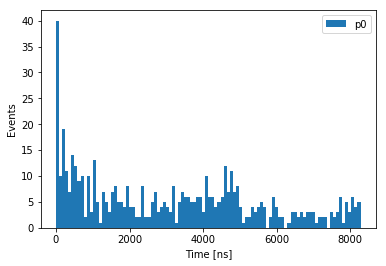

In [76]:
# esegue taglio piano 0 
p0 = cut_p0(data_used)
p0 = p0['p0_time']
print('P0 events:', len(p0))

# istogramma taglio
plt.hist(p0, bins=100, label='p0')
plt.xlabel('Time [ns]')
plt.ylabel('Events')
plt.legend()
plt.show()

P1 events: 11732


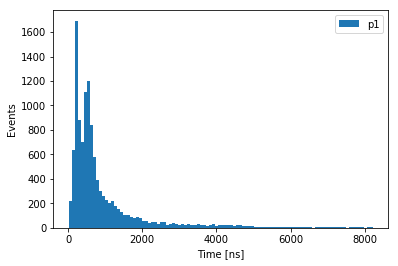

In [77]:
# esegue taglio piano 1
p1 = cut_p1(data_used)
p1 = p1['p1_time']
print('P1 events:', len(p1))

# istogramma taglio
plt.hist(p1, bins=100, label='p1')
plt.xlabel('Time [ns]')
plt.ylabel('Events')
plt.legend()
plt.show()

P2 events: 1579


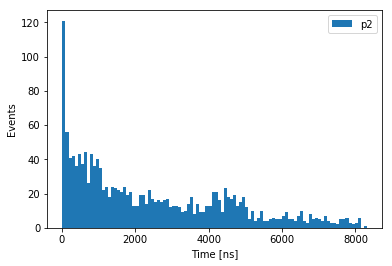

In [117]:
# esegue taglio piano 2
p2 = cut_p2(data_used)
p2 = p2['p2_time']
print('P2 events:', len(p2))

# istogramma taglio
plt.hist(p2, bins=100, label='p2')
plt.xlabel('Time [ns]')
plt.ylabel('Events')
plt.legend()
plt.show()

Events used: 12441
Events: 13399


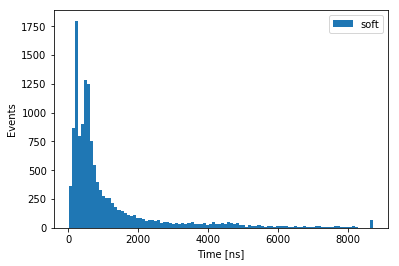

In [125]:
# esegue taglio: segnale su 1 ma non su 2, 0 indifferente + segnale su 2 ma non su 0 e 1
p_ms = cut_muon_soft(data_used)
p_ms1 = p_ms['p1_time'][(p_ms.p0_1==4095) & (p_ms.p0_2==4095)]
p_ms1 = p_ms1.rename(columns={'p1_time':'time'})
p_ms0 = p_ms['p0_time'][(p_ms.p1_1!=4095) & (p_ms.p1_2!=4095)]
p_ms0 = p_ms0.rename(columns={'p0_time':'time'})
p2 = p2.rename(columns={'p2_time':'time'})
p_merged = pd.concat([p_ms1,p_ms0,p2])

print('Events used:', len(p_ms))
print('Events:', len(p_merged))

# istogramma taglio
plt.hist(p_merged, bins=100, label='soft')
plt.xlabel('Time [ns]')
plt.ylabel('Events')
plt.legend()
plt.show()